In [15]:
# import thư viện
import numpy as np
import csv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [16]:
# Đọc dữ liệu
# link down dữ liệu : https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
with open('Handwritten_Data.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # Đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)

In [17]:
print(np.shape(rows[0]))

(785,)


In [18]:
train_data = [] # dữ liệu training
train_label = [] # label của chúng

for letter in rows:
    x = np.array([int(i) for i in letter[1:]])
    x = x.reshape(28, 28)
    train_data.append(x)
    train_label.append(int(letter[0]))

In [19]:
print(len(train_label))

372451


In [20]:
# Xáo trộn dữ liệu
import random

shuffle_order = list(range(372451))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]
print(train_label[0])
print(train_data.shape)

3
(372451, 28, 28)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(len(X_train))
print(len(X_test))
print(len(X_val))

223470
74491
74490


In [22]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(223470, 28, 28, 1)


In [23]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 26)
Y_val = np_utils.to_categorical(y_val, 26)
Y_test = np_utils.to_categorical(y_test, 26)
print('Dữ liệu y ban đầu: ', y_train[0])
print('Dữ liệu y sau one-hot encoding: ', Y_train[0])

Dữ liệu y ban đầu:  20
Dữ liệu y sau one-hot encoding:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]


In [27]:
# 5. Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# Dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 26 node và dùng softmax function để chuyển sang xác suất
model.add(Dense(26, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)
model.save('model2.h5')

Epoch 1/10
6984/6984 [==============================] - 250s 36ms/step - loss: 0.2173 - accuracy: 0.9459 - val_loss: 0.0806 - val_accuracy: 0.9773
Epoch 2/10
6984/6984 [==============================] - 250s 36ms/step - loss: 0.0609 - accuracy: 0.9833 - val_loss: 0.0637 - val_accuracy: 0.9815
Epoch 3/10
6984/6984 [==============================] - 253s 36ms/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.0510 - val_accuracy: 0.9857
Epoch 4/10
6984/6984 [==============================] - 248s 35ms/step - loss: 0.0311 - accuracy: 0.9911 - val_loss: 0.0444 - val_accuracy: 0.9878
Epoch 5/10
6984/6984 [==============================] - 250s 36ms/step - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.0415 - val_accuracy: 0.9886
Epoch 6/10
6984/6984 [==============================] - 262s 38ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0377 - val_accuracy: 0.9902
Epoch 7/10
6984/6984 [==============================] - 272s 39ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0

Dữ liệu:  15181
1/1 [==============================] - 0s 17ms/step
Giá trị dự đoán:  A


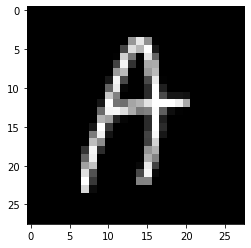

In [42]:
import random 
import string
num2alpha = dict(zip(range(0, 26), string.ascii_uppercase))

rd = random.randrange(74490)
print('Dữ liệu: ',rd)
plt.imshow(X_test[rd].reshape(28, 28), cmap='gray')
y_predict = model.predict(X_test[rd].reshape(1, 28, 28, 1))
print('Giá trị dự đoán: ', num2alpha[np.argmax(y_predict)])
